In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pickle.load('hotel_reviews_final.pkl')
df.head()

index,name,room_type,nights_stayed,month_stayed,occupant_type,from_country,review_score,date_reviewed,short_review,positive_review,negative_review,url
0,Gene,,2 nights,January 2020,Couple,Philippines,10,January 2020,Exceptional,I love the pool coz I was so lucky to swim alo...,nothing..,https://www.booking.com/hotel/ph/meranti.html?...
1,Sheila,Executive Twin Room,1 night,November 2022,Family,Philippines,7.0,November 2022,"Overall, we love the place, the staff and all...",We like that all the staff are very friendly. ...,I'm unhappy that we only got plated breakfast ...,https://www.booking.com/hotel/ph/meranti.html?...
2,Greggy,Executive Twin Room,1 night,October 2022,Solo traveler,Philippines,8.0,October 2022,Nice,Simple and comfortable,the location,https://www.booking.com/hotel/ph/meranti.html?...
3,Tay,Executive Twin Room,2 nights,October 2022,Family,Cambodia,7.0,October 2022,Good,Staff,Lack of service facilties not even coffee in r...,https://www.booking.com/hotel/ph/meranti.html?...
4,Joseph,Executive Twin Room,1 night,July 2022,Family,Philippines,9.0,July 2022,"Overall, it was a very comfortable experience...",The room was very clean and everything we need...,,https://www.booking.com/hotel/ph/meranti.html?...


In [3]:
df1 = pd.read_pickle('hotel_surroundings_link.pkl')
df1.head()

,hotel_name_,nearest_airport,ave_airport,nearest_resto,nearest_train,nearest_ocean,nearest_other,number_close,nearest_other_2km,url
0,RedDoorz near East Avenue Medical Center,15.0,61.0,0.10,12.0,12.0,0.90,21,3,https://www.booking.com/hotel/ph/reddoorz-near...
1,Skylab Guesthouse,12.0,63.0,0.20,11.0,6.0,0.95,21,2,https://www.booking.com/hotel/ph/skylab213b.ht...
2,The Excelsior Hotel Las Piñas,8.0,62.0,0.04,17.0,11.0,0.55,20,5,https://www.booking.com/hotel/ph/the-excelsior...
3,Rothman Hotel,8.0,57.0,0.10,0.9,0.3,0.25,19,10,https://www.booking.com/hotel/ph/rothman-manil...
4,OYO 772 Remedios Apartment,7.0,57.0,0.10,0.5,1.0,0.60,19,10,https://www.booking.com/hotel/ph/oyo-772-remed...


In [4]:
df_merge = pd.merge(df, df1, how = 'left', on = 'url')
df_merge.head()

,name,room_type,nights_stayed,month_stayed,occupant_type,from_country,review_score,date_reviewed,short_review,positive_review,...,url,hotel_name_,nearest_airport,ave_airport,nearest_resto,nearest_train,nearest_ocean,nearest_other,number_close,nearest_other_2km
0,Gene,,2 nights,January 2020,Couple,Philippines,10,January 2020,Exceptional,I love the pool coz I was so lucky to swim alo...,...,https://www.booking.com/hotel/ph/meranti.html?...,Privato Quezon City - Multiple Use Hotel,13.0,59.0,0.01,16.0,8.0,0.8,21,2
1,Sheila,Executive Twin Room,1 night,November 2022,Family,Philippines,7.0,November 2022,"Overall, we love the place, the staff and all...",We like that all the staff are very friendly. ...,...,https://www.booking.com/hotel/ph/meranti.html?...,Privato Quezon City - Multiple Use Hotel,13.0,59.0,0.01,16.0,8.0,0.8,21,2
2,Greggy,Executive Twin Room,1 night,October 2022,Solo traveler,Philippines,8.0,October 2022,Nice,Simple and comfortable,...,https://www.booking.com/hotel/ph/meranti.html?...,Privato Quezon City - Multiple Use Hotel,13.0,59.0,0.01,16.0,8.0,0.8,21,2
3,Tay,Executive Twin Room,2 nights,October 2022,Family,Cambodia,7.0,October 2022,Good,Staff,...,https://www.booking.com/hotel/ph/meranti.html?...,Privato Quezon City - Multiple Use Hotel,13.0,59.0,0.01,16.0,8.0,0.8,21,2
4,Joseph,Executive Twin Room,1 night,July 2022,Family,Philippines,9.0,July 2022,"Overall, it was a very comfortable experience...",The room was very clean and everything we need...,...,https://www.booking.com/hotel/ph/meranti.html?...,Privato Quezon City - Multiple Use Hotel,13.0,59.0,0.01,16.0,8.0,0.8,21,2


In [5]:
df_merge['review_score'] = df_merge['review_score'].astype('float')

In [6]:
def class_stay(x):
    if x > 7.5:
        return 'positive'
    else:
        return 'negative'

def round_score(x):
    return round(x, 0)

def nationality(x):
    if x == 'Philippines':
        return 'Filipino'
    else:
        return 'International'


In [7]:
df_merge['stay'] = df_merge['review_score'].apply(class_stay)
df_merge['score_int'] = df_merge['review_score'].apply(round_score)
df_merge['nationality'] = df_merge['from_country'].apply(nationality)
df_merge

,name,room_type,nights_stayed,month_stayed,occupant_type,from_country,review_score,date_reviewed,short_review,positive_review,...,ave_airport,nearest_resto,nearest_train,nearest_ocean,nearest_other,number_close,nearest_other_2km,stay,score_int,nationality
0,Gene,,2 nights,January 2020,Couple,Philippines,10.0,January 2020,Exceptional,I love the pool coz I was so lucky to swim alo...,...,59.0,0.01,16.0,8.00,0.80,21,2,positive,10.0,Filipino
1,Sheila,Executive Twin Room,1 night,November 2022,Family,Philippines,7.0,November 2022,"Overall, we love the place, the staff and all...",We like that all the staff are very friendly. ...,...,59.0,0.01,16.0,8.00,0.80,21,2,negative,7.0,Filipino
2,Greggy,Executive Twin Room,1 night,October 2022,Solo traveler,Philippines,8.0,October 2022,Nice,Simple and comfortable,...,59.0,0.01,16.0,8.00,0.80,21,2,positive,8.0,Filipino
3,Tay,Executive Twin Room,2 nights,October 2022,Family,Cambodia,7.0,October 2022,Good,Staff,...,59.0,0.01,16.0,8.00,0.80,21,2,negative,7.0,International
4,Joseph,Executive Twin Room,1 night,July 2022,Family,Philippines,9.0,July 2022,"Overall, it was a very comfortable experience...",The room was very clean and everything we need...,...,59.0,0.01,16.0,8.00,0.80,21,2,positive,9.0,Filipino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77951,Anonymous,,2 nights,January 2021,Solo traveler,Philippines,9.0,January 2021,Wonderful,There are no comments available for this review,...,56.0,0.10,1.0,0.35,0.02,19,11,positive,9.0,Filipino
77952,Anonymous,,2 nights,December 2020,Group,Philippines,8.0,December 2020,Very Good,There are no comments available for this review,...,56.0,0.10,1.0,0.35,0.02,19,11,positive,8.0,Filipino
77953,Anonymous,,1 night,October 2020,Family,Philippines,8.0,October 2020,Very Good,There are no comments available for this review,...,56.0,0.10,1.0,0.35,0.02,19,11,positive,8.0,Filipino
77954,Anonymous,,3 nights,February 2021,Solo traveler,Philippines,10.0,February 2021,Exceptional,There are no comments available for this review,...,56.0,0.10,1.0,0.35,0.02,19,11,positive,10.0,Filipino


### Plot mean estab with reviews

<AxesSubplot: xlabel='mean', ylabel='stay'>

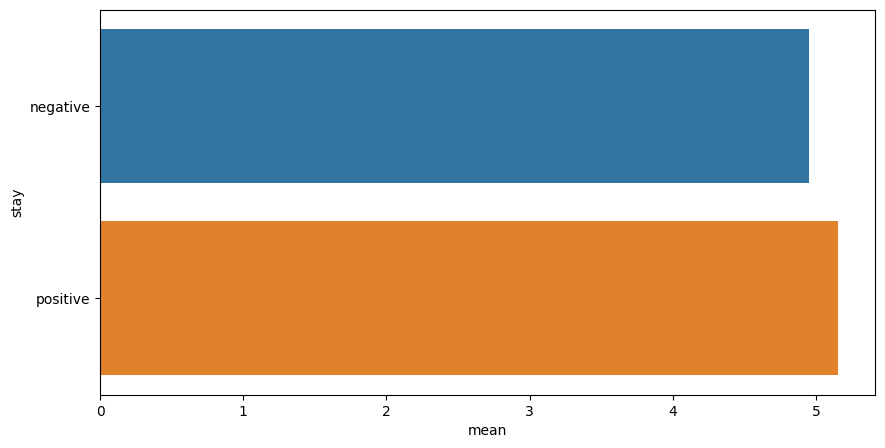

In [8]:
df_estab_num = df_merge.groupby(by = ['stay'])['nearest_other_2km'].mean().reset_index(name = 'mean')
df_estab_num

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(df_estab_num, x = 'mean', y = 'stay')

<AxesSubplot: xlabel='mean', ylabel='stay'>

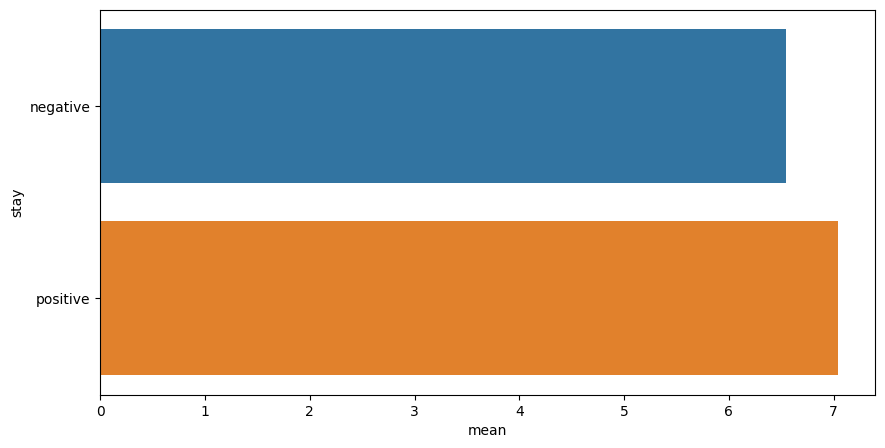

In [9]:
df_estab_train = df_merge.groupby(by = ['stay'])['nearest_train'].mean().reset_index(name = 'mean')

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(df_estab_train, x = 'mean', y = 'stay')

In [10]:
df_estab_resto = df_merge.groupby(by = ['stay'])['nearest_resto'].mean().reset_index(name = 'mean')
df_estab_resto

,stay,mean
0,negative,0.177296
1,positive,0.153536


### By Scores

Text(0.5, 0, 'Average Number of Attractions')

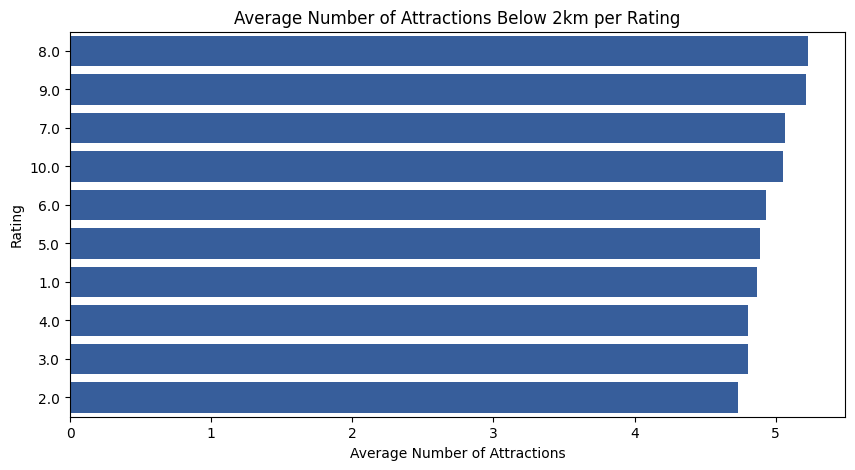

In [11]:
df_estab_num = df_merge.groupby(by = ['score_int'])['nearest_other_2km'].mean().reset_index(name = 'mean')
df_estab_num

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(df_estab_num, x = 'mean', y = 'score_int', orient='h', color = '#275aab',
           order = df_estab_num.sort_values('mean', ascending = False).score_int)

ax.set_title('Average Number of Attractions Below 2km per Rating')
ax.set_ylabel('Rating')
ax.set_xlabel('Average Number of Attractions')

Text(0.5, 0, 'Average Distance to Public Transpo')

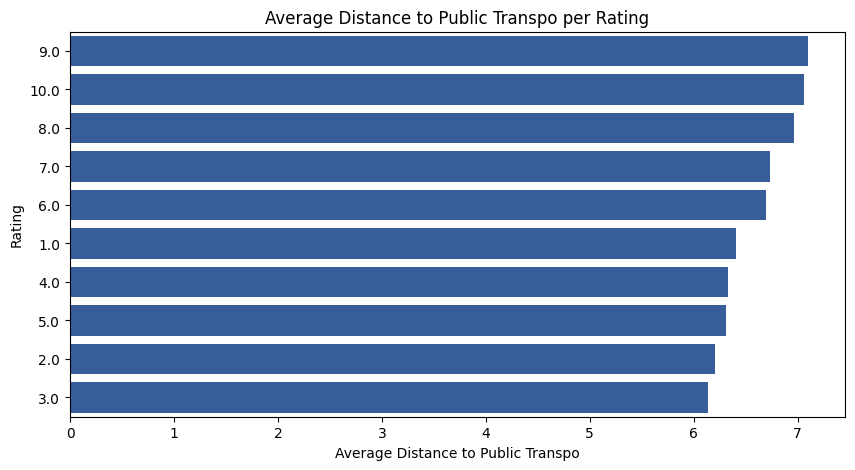

In [12]:
df_rate_train = df_merge.groupby(by = ['score_int'])['nearest_train'].mean().reset_index(name = 'mean')
# df_rate_train

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(df_rate_train, x = 'mean', y = 'score_int', orient='h', color = '#275aab',
           order = df_rate_train.sort_values('mean', ascending = False).score_int)

ax.set_title('Average Distance to Public Transpo per Rating')
ax.set_ylabel('Rating')
ax.set_xlabel('Average Distance to Public Transpo')

Text(0.5, 0, 'Average Distance to Airport')

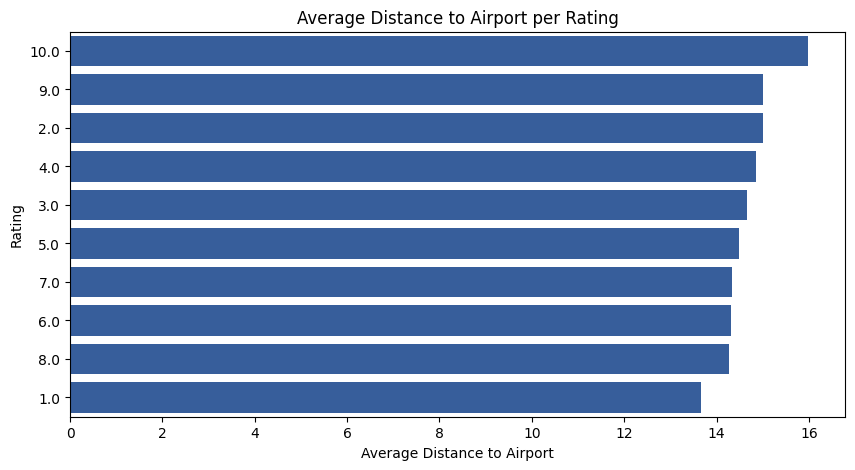

In [13]:
df_rate_airport = df_merge.groupby(by = ['score_int'])['nearest_airport'].mean().reset_index(name = 'mean')
# df_rate_train

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(df_rate_airport, x = 'mean', y = 'score_int', orient='h', color = '#275aab',
           order = df_rate_airport.sort_values('mean', ascending = False).score_int)

ax.set_title('Average Distance to Airport per Rating')
ax.set_ylabel('Rating')
ax.set_xlabel('Average Distance to Airport')

## Local vs International

In [14]:
df_merge['nationality'].value_counts()

International    42580
Filipino         35376
Name: nationality, dtype: int64

In [15]:
df_international = df_merge[df_merge['nationality'] == 'International']

In [16]:
# df_estab_airport = df_international.groupby(by = ['stay'])['nearest_airport'].mean().reset_index(name = 'mean')
# df_estab_airport

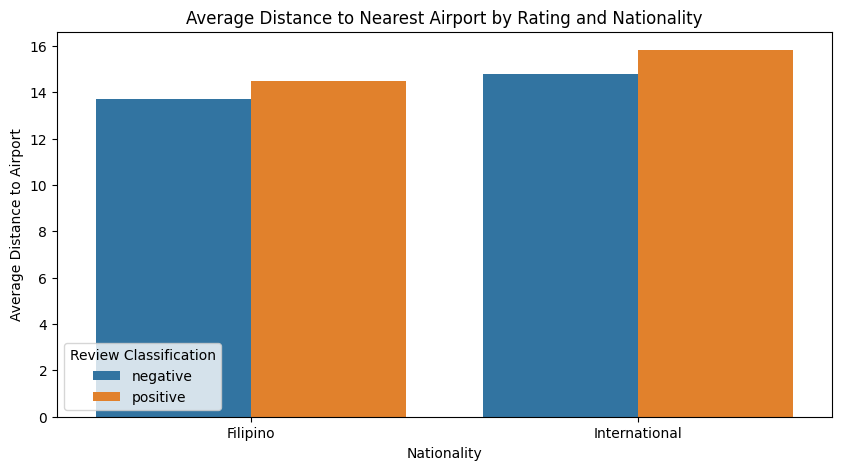

In [17]:
df_airport_nationality = df_merge.groupby(by = ['nationality', 'stay'])['nearest_airport'].mean().reset_index(name = 'mean')
df_airport_nationality

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(df_airport_nationality, x = 'nationality', y = 'mean', hue = 'stay', width=0.8)

ax.set_title('Average Distance to Nearest Airport by Rating and Nationality')
ax.set_xlabel('Nationality')
ax.set_ylabel('Average Distance to Airport')
ax.legend(title='Review Classification', loc='lower left')

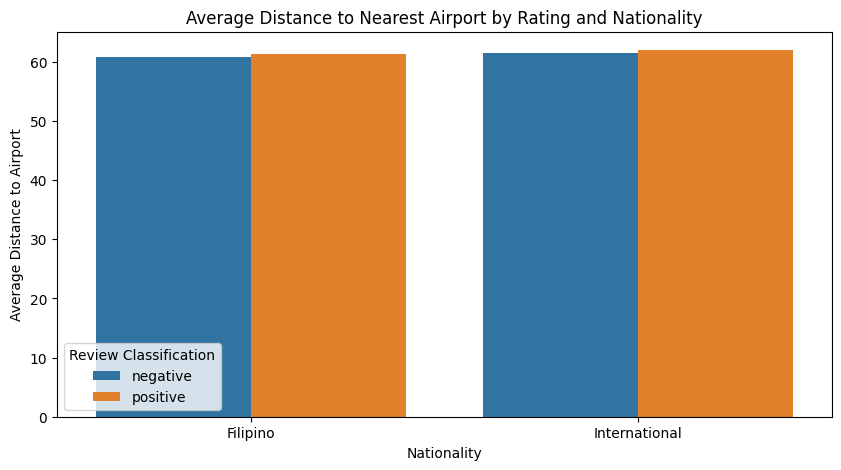

In [18]:
df_airport_ave_nationality = df_merge.groupby(by = ['nationality', 'stay'])['ave_airport'].mean().reset_index(name = 'mean')
df_airport_ave_nationality

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(df_airport_ave_nationality, x = 'nationality', y = 'mean', hue = 'stay', width=0.8)

ax.set_title('Average Distance to Nearest Airport by Rating and Nationality')
ax.set_xlabel('Nationality')
ax.set_ylabel('Average Distance to Airport')
ax.legend(title='Review Classification', loc='lower left')

## Rating per City

In [19]:
df_city1 = pd.read_pickle('hotel_location.pkl')
df_city2= df_city1.drop(['hotel_name_', 'location'], axis = 1)
df_city2

,zip_code,city,latitude,longitude,url
0,1100,Quezon City,14.650991,121.048615,https://www.booking.com/hotel/ph/reddoorz-near...
1,1700,Parañaque,14.499822,120.991487,https://www.booking.com/hotel/ph/skylab213b.ht...
2,1750,Las Piñas,14.480424,120.980870,https://www.booking.com/hotel/ph/the-excelsior...
3,1004,Manila,14.594891,120.978262,https://www.booking.com/hotel/ph/rothman-manil...
4,1004,Manila,14.594891,120.978262,https://www.booking.com/hotel/ph/oyo-772-remed...
...,...,...,...,...,...
302,1300,Pasay,14.543700,120.994650,https://www.booking.com/hotel/ph/reddoorz-edsa...
303,1300,Pasay,14.543700,120.994650,https://www.booking.com/hotel/ph/kabayan-pasay...
304,1781,Muntinlupa,14.389263,121.044910,https://www.booking.com/hotel/ph/crimson-filin...
305,1008,Manila,14.594891,120.978262,https://www.booking.com/hotel/ph/reddoorz-jard...


In [20]:
df_merge = pd.merge(df_merge, df_city2, on = 'url', how = 'left')
df_merge

,name,room_type,nights_stayed,month_stayed,occupant_type,from_country,review_score,date_reviewed,short_review,positive_review,...,nearest_other,number_close,nearest_other_2km,stay,score_int,nationality,zip_code,city,latitude,longitude
0,Gene,,2 nights,January 2020,Couple,Philippines,10.0,January 2020,Exceptional,I love the pool coz I was so lucky to swim alo...,...,0.80,21,2,positive,10.0,Filipino,1103,Quezon City,14.650991,121.048615
1,Sheila,Executive Twin Room,1 night,November 2022,Family,Philippines,7.0,November 2022,"Overall, we love the place, the staff and all...",We like that all the staff are very friendly. ...,...,0.80,21,2,negative,7.0,Filipino,1103,Quezon City,14.650991,121.048615
2,Greggy,Executive Twin Room,1 night,October 2022,Solo traveler,Philippines,8.0,October 2022,Nice,Simple and comfortable,...,0.80,21,2,positive,8.0,Filipino,1103,Quezon City,14.650991,121.048615
3,Tay,Executive Twin Room,2 nights,October 2022,Family,Cambodia,7.0,October 2022,Good,Staff,...,0.80,21,2,negative,7.0,International,1103,Quezon City,14.650991,121.048615
4,Joseph,Executive Twin Room,1 night,July 2022,Family,Philippines,9.0,July 2022,"Overall, it was a very comfortable experience...",The room was very clean and everything we need...,...,0.80,21,2,positive,9.0,Filipino,1103,Quezon City,14.650991,121.048615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77951,Anonymous,,2 nights,January 2021,Solo traveler,Philippines,9.0,January 2021,Wonderful,There are no comments available for this review,...,0.02,19,11,positive,9.0,Filipino,1000,Manila,14.594891,120.978262
77952,Anonymous,,2 nights,December 2020,Group,Philippines,8.0,December 2020,Very Good,There are no comments available for this review,...,0.02,19,11,positive,8.0,Filipino,1000,Manila,14.594891,120.978262
77953,Anonymous,,1 night,October 2020,Family,Philippines,8.0,October 2020,Very Good,There are no comments available for this review,...,0.02,19,11,positive,8.0,Filipino,1000,Manila,14.594891,120.978262
77954,Anonymous,,3 nights,February 2021,Solo traveler,Philippines,10.0,February 2021,Exceptional,There are no comments available for this review,...,0.02,19,11,positive,10.0,Filipino,1000,Manila,14.594891,120.978262


Text(0.5, 0, 'Average Review Rating')

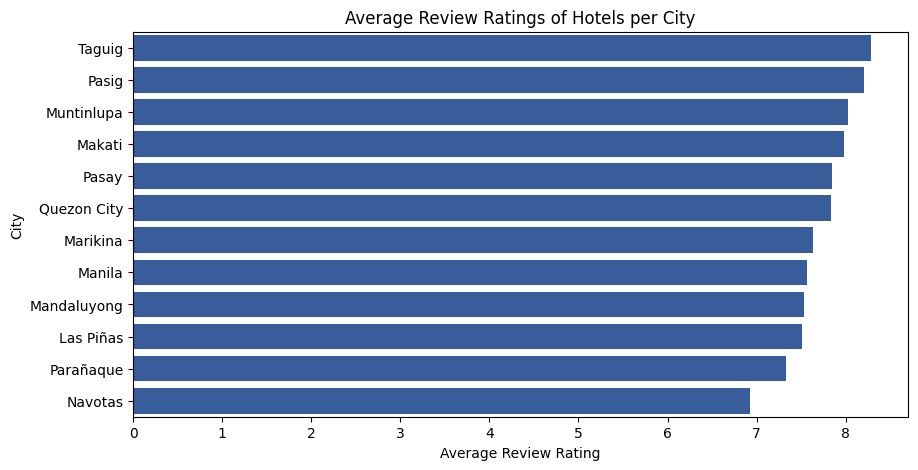

In [21]:
df_rate_city = df_merge.groupby(by = ['city'])['review_score'].mean().reset_index(name = 'mean')
df_rate_city

fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(df_rate_city, x = 'mean', y = 'city', orient='h', color = '#275aab',
           order = df_rate_city.sort_values('mean', ascending = False).city)

ax.set_title('Average Review Ratings of Hotels per City')
ax.set_ylabel('City')
ax.set_xlabel('Average Review Rating')

## Count of Reviews

Text(0.5, 0, 'Number of Reviews')

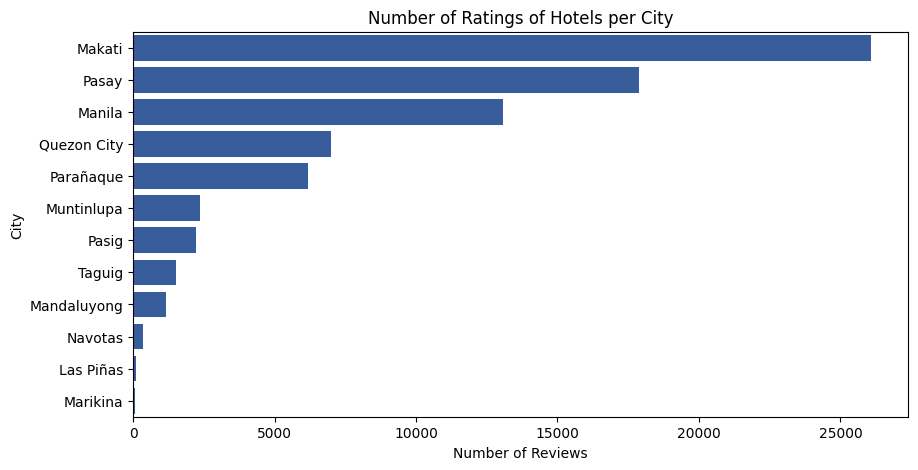

In [22]:
df_count_city = df_merge.groupby(by = ['city'])['review_score'].count().reset_index(name = 'count')
df_count_city

fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(df_count_city, x = 'count', y = 'city', orient='h', color = '#275aab',
           order = df_count_city.sort_values('count', ascending = False).city)

ax.set_title('Number of Ratings of Hotels per City')
ax.set_ylabel('City')
ax.set_xlabel('Number of Reviews')

## Pricing vs Location

In [23]:
df_price = pd.read_pickle('merged_hotel_data_withprice.pkl')
df_price['url'] = df_price['link']
df_price2 = df_price[['url', 'price']]
# df_price1 = df_price[['city', 'latitude', 'longitude', 'stars', 'cheapest_price']]
# df_price1

In [32]:
# df_price3 = pd.merge(df_merge, df_price2, on = 'url', how = 'left')
# df_price3

Text(0.5, 0, 'Average Price of Hotels')

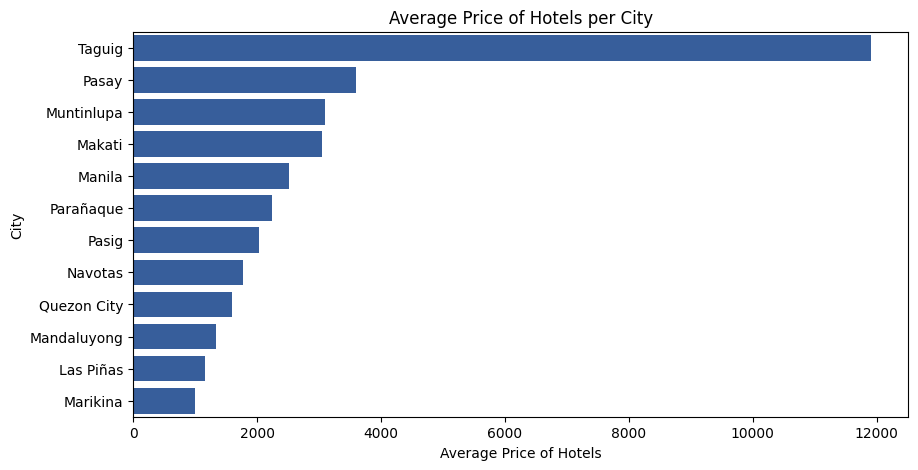

In [25]:
df_price_city = df_price3.groupby(by = ['city'])['price'].mean().reset_index(name = 'mean')
df_price_city

fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(df_price_city, x = 'mean', y = 'city', orient='h', color = '#275aab',
           order = df_price_city.sort_values('mean', ascending = False).city)

ax.set_title('Average Price of Hotels per City')
ax.set_ylabel('City')
ax.set_xlabel('Average Price of Hotels')

In [34]:
len(df_price[df_price['price'].isna()== True])

18685

In [35]:
df_price['room_type']

0                   
1        Triple Room
2                   
3        Deluxe Room
4        Triple Room
            ...     
76531               
76532               
76533               
76534               
76535               
Name: room_type, Length: 76536, dtype: object